# Facial Tracking using FaceNet-PyTorch:
## Can my face be tracked?
---
Fascinated by the facial tracking technology, I tested the pretrained facial tracking model [FaceNet-PyTorch](https://github.com/timesler/facenet-pytorch) with my photo and video.

Contents
- [Section 1: Setup](#Section-1:-Setup)
- [Section 2: Tracking](#Section-2:-Tracking)


## Section 1: Setup

In [1]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

No CUDA runtime is found, using CUDA_HOME='/hpc/spack/opt/spack/linux-centos7-broadwell/gcc-9.2.0/cuda-11.4.2-nxqfgxjhusk4pttcrprmdmzfavbbeqdz'


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

# MTCNN is a collection of neural nets and other code. See help(MTCNN) for more details.
mtcnn = MTCNN(keep_all=True, device=device)


Running on device: cpu


## Section 2: Tracking

Let's locate faces!

/users/myim/.conda/envs/myenv/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


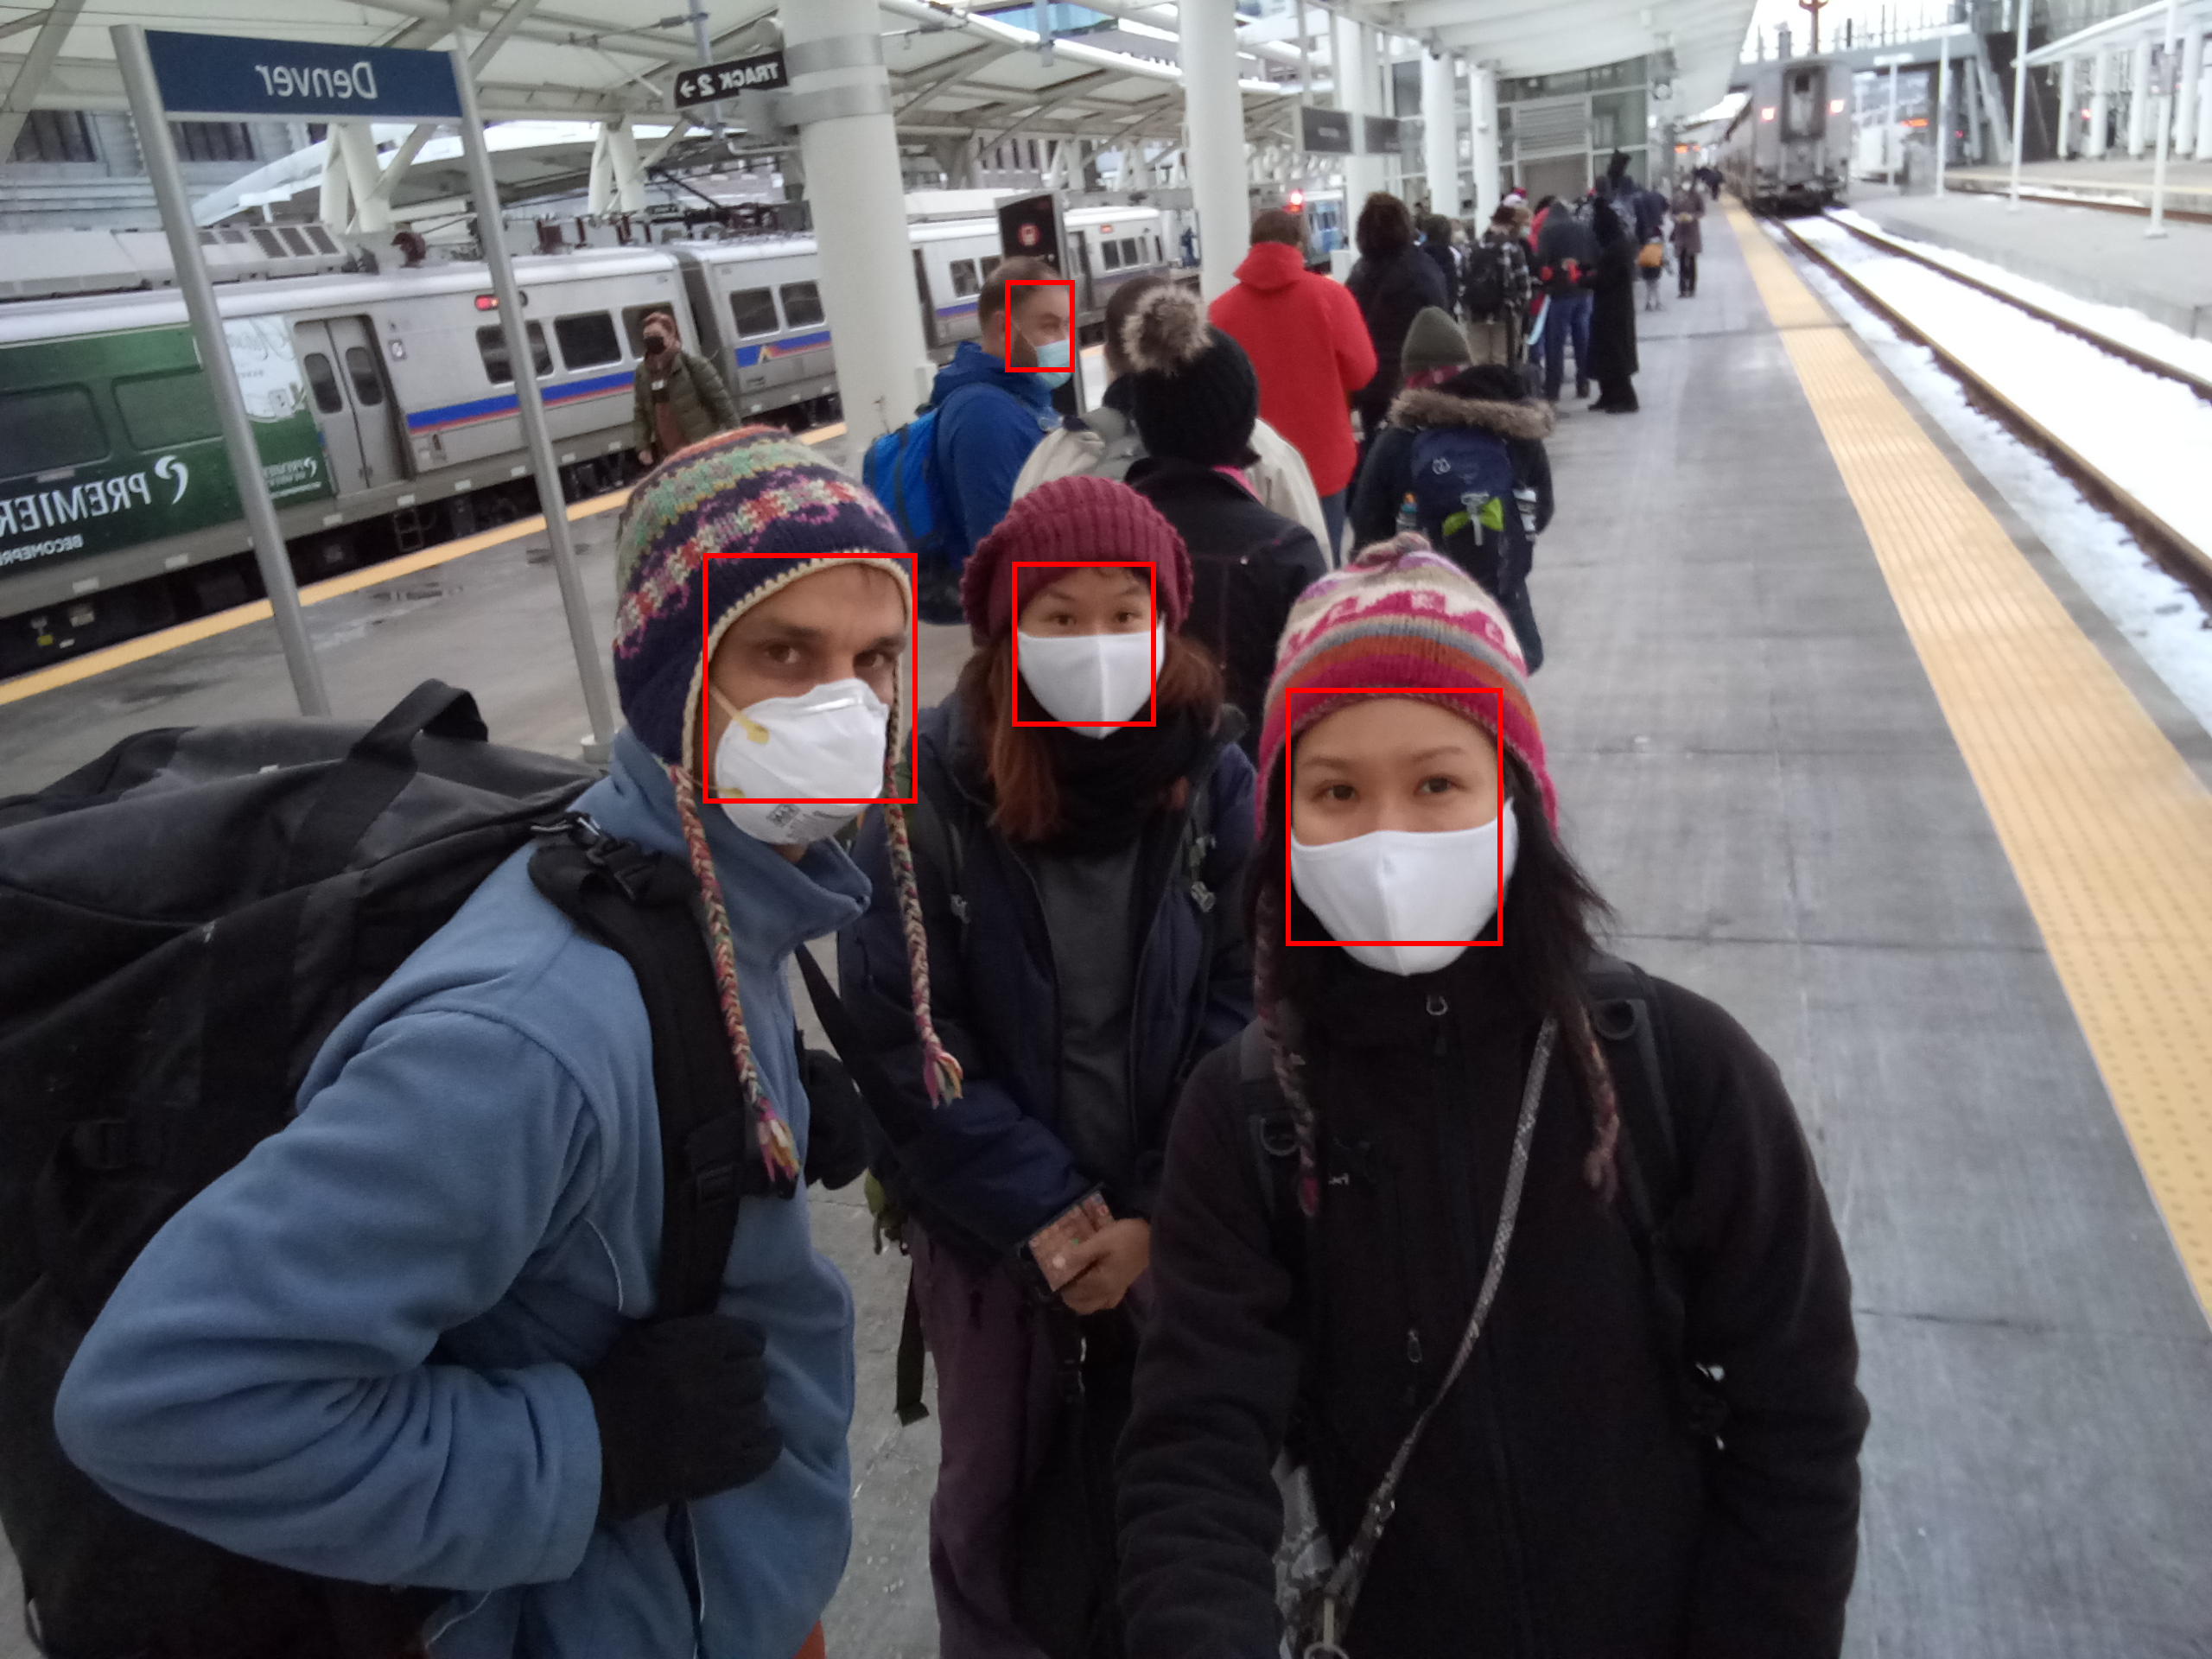

In [3]:
# Track faces in a photo
photo = Image.open('three.jpg')

# Detect faces
boxes, _ = mtcnn.detect(photo)

# Draw faces
photo_draw = photo.copy()
draw = ImageDraw.Draw(photo_draw)
for box in boxes:
    if abs(box[0]-box[2]) > 40 and abs(box[1]-box[3]) > 40:  # discard too small boxes
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)

# Display
d = display.display(photo_draw)

Let's track faces!

In [4]:
# Track faces in a video
vname = 'manyi_winterpark.mp4'
video = mmcv.VideoReader(vname)
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video(vname, width=640)

In [5]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    if (np.array(boxes != None)).any():
        for box in boxes:
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')

Tracking frame: 1

/tmp/ipykernel_24712/2280941216.py:16: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))


Tracking frame: 81
Done


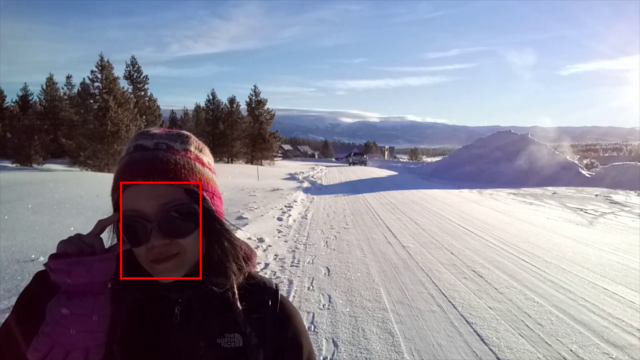

In [7]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
while i < 70:
    d.update(frames_tracked[i % len(frames_tracked)])
    i += 1

In [8]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('manyi_winterpark_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()

OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


The [original video](https://github.com/myyim/FaceNet/blob/main/manyi_winterpark.mp4) and the [tracked video](https://github.com/myyim/FaceNet/blob/main/manyi_winterpark_tracked.mp4).